In [2]:
# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Import data
mcu_dataset=pd.read_csv("mcu dataset.csv", 
                        parse_dates = ["US release Date"])
mcu_dataset.head()

,Name,US release Date,Director,Producer,Duration,Genre,IMDB rating,metascore,Cast,Budget,Domestic Gross,Total Gross,Opening Gross,Oscar Nomination,Oscar won,Phase
0,Iron Man,2008-05-02,Jon Favreau,Avi Arad and Kevin Feige,2h 6min,"Action , Adventure, Sci-Fi",7.9,79,"Robert Downey Jr. , Gweneth Paltrow , Terrence...","$140,000,000","$318,604,126","$585,366,247","$98,618,668",2,0,1
1,The incredible Hulk,2008-06-13,Louis Leterrier,"Avi Arad ,Gale Ann Hurd and Kevin Feige",1h 52min,"Action , Adventure, Sci-Fi",6.6,61,"Edward Norton , Liv Tyler , Tim Roth","$150,000,000","$134,806,913","$264,770,996","$55,414,050",0,0,1
2,Iron Man 2,2010-05-07,Jon Favreau,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",7.0,57,"Robert Downey Jr. , Gweneth Paltrow , Mickey R...","$200,000,000","$312,433,331","$623,933,331","$128,122,480",1,0,1
3,Thor,2011-05-06,Kenneth Branagh,Kevin Feige,1h 55min,"Action , Adventure, Fantasy",7.0,57,"Chris Hemsworth , Anthony Hopkins , Natalie Po...","$150,000,000","$181,030,624","$449,326,618","$65,723,338",0,0,1
4,Captain America: The first Avenger,2011-07-22,Joe Jhonston,Kevin Feige,2h 4min,"Action , Adventure, Sci-Fi",6.9,66,"Chris Evans , Hugo Weaving , Samuel L. Jackson","$140,000,000","$176,654,505","$370,569,774","$65,058,524",0,0,1


## Preparing the data
In this section, the presence of missing values and duplicate lines will be checked.
Then, we will convert columns into different data types.

*Note: this section presents data transformations and python code used to process the data. Readers not interested in these technical details can jump ahead to the next section of this report, titled Link between Budget and IMBD rating (and metascore)*

In [3]:
# Check for missing values and data types
mcu_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Name              23 non-null     object        
 1   US release Date   23 non-null     datetime64[ns]
 2   Director          23 non-null     object        
 3   Producer          23 non-null     object        
 4   Duration          23 non-null     object        
 5   Genre             23 non-null     object        
 6   IMDB rating       23 non-null     float64       
 7   metascore         23 non-null     int64         
 8   Cast              23 non-null     object        
 9   Budget            23 non-null     object        
 10  Domestic Gross    23 non-null     object        
 11  Total Gross       23 non-null     object        
 12  Opening Gross     23 non-null     object        
 13  Oscar Nomination  23 non-null     int64         
 14  Oscar won         23 non-nul

In [4]:
# Check for duplicates
mcu_dataset.duplicated().any()

False

In [5]:
# Change the dollar columns to integer#
def convert_to_num(dollar_col):
    """
    Convert a dollar column from mcu_dataset to float by removing "$", "," and
    changing the type to float.

    Parameters
    ----------
    series : pandas.core.series.Series
        The Series object to be converted

    Returns
    -------
    
    pandas.core.series.Series
    The converted Series object

    """
    dollar_col=dollar_col.str.replace("$", "")
    dollar_col=dollar_col.str.replace(",", "")
    dollar_col=dollar_col.astype("float")
    return dollar_col

    
dollar_columns = ['Budget', 'Domestic Gross', 'Total Gross', 'Opening Gross']

mcu_dataset.loc[:, dollar_columns] = mcu_dataset.loc[:, dollar_columns].apply(convert_to_num)
    
# Rename the dollar columns
mcu_dataset.columns= ['Name', 'US release Date', 'Director', 'Producer', 'Duration', 'Genre',
       'IMDB rating', 'metascore', 'Cast', 'Budget($)', 'Domestic Gross($)',
       'Total Gross($)', 'Opening Gross($)', 'Oscar Nomination', 'Oscar won',
       'Phase']

C:\Users\EXO629\AppData\Local\Temp\ipykernel_7144\2057271708.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dollar_col=dollar_col.str.replace("$", "")


In [6]:
# Convert the "Phase" column to category
mcu_dataset["Phase"]=mcu_dataset.Phase.astype("category")

assert mcu_dataset["Phase"].dtype=="category"                           #if not True, it will raise an AssertionError

In [7]:
# Convert the "Duration" colum to timedelta
mcu_dataset["Duration"]=pd.to_timedelta(mcu_dataset.Duration)

In [8]:
mcu_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Name               23 non-null     object         
 1   US release Date    23 non-null     datetime64[ns] 
 2   Director           23 non-null     object         
 3   Producer           23 non-null     object         
 4   Duration           23 non-null     timedelta64[ns]
 5   Genre              23 non-null     object         
 6   IMDB rating        23 non-null     float64        
 7   metascore          23 non-null     int64          
 8   Cast               23 non-null     object         
 9   Budget($)          23 non-null     float64        
 10  Domestic Gross($)  23 non-null     float64        
 11  Total Gross($)     23 non-null     float64        
 12  Opening Gross($)   23 non-null     float64        
 13  Oscar Nomination   23 non-null     int64          
 

## Developing data visualization tools

In this section, we will create different graphs to help us answer certain questions.

### Link between Budget and IMBD rating
First of all, we wanted to investigate a possible link between the budget invested in a film and its success with critics. Before doing so, we wanted to analyse the evolution of film expenditure over time in order to perhaps observe a trend.

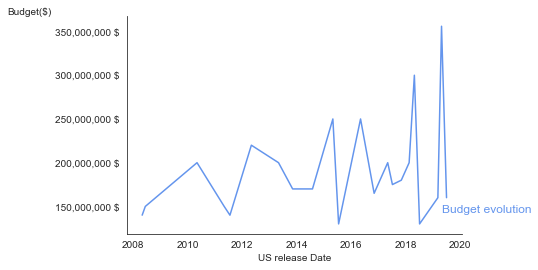

In [10]:
sns.set_style("white")
f, axes= plt.subplots(1,1)

# Evolution budget accross time
g=sns.lineplot(x="US release Date", y="Budget($)", data=mcu_dataset, 
               color="cornflowerblue")

# Label and annoatation
g.set_ylabel("Budget($)", loc="top", rotation=360)

plt.annotate("Budget evolution", (mcu_dataset["US release Date"].iloc[-1], 
                                  mcu_dataset["Budget($)"].iloc[-1]), 
             textcoords="offset points", xytext=(40,-15), ha='center', 
             fontsize=12, color="cornflowerblue")
             
x=mcu_dataset["Budget($)"]                                                  #variable to avoid 2 pairs of quotation marks
formatter = ticker.StrMethodFormatter('{x:,.0f} $')                         # add dollar sign in the y label        
g.yaxis.set_major_formatter(formatter)
sns.despine()                                                               #remove borders

plt.show()

It can be seen that the larger budgets tend to be more and more important over the years. This is a kind of clue to our answer, because since spending has increased for more than a decade, we can assume that this is due to the fact that the successes have been achieved.